# Dataset Information

#### Name - Siddharth Agarwal

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.



### Attribute Information:

1) sepal length in cm

2) sepal width in cm

3) petal length in cm

4) petal width in cm

5) class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [7]:
#droping ID 
data = data.drop(columns = ['Id'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Exploratory Data Analysis

Text(0, 0.5, 'Y Axis')

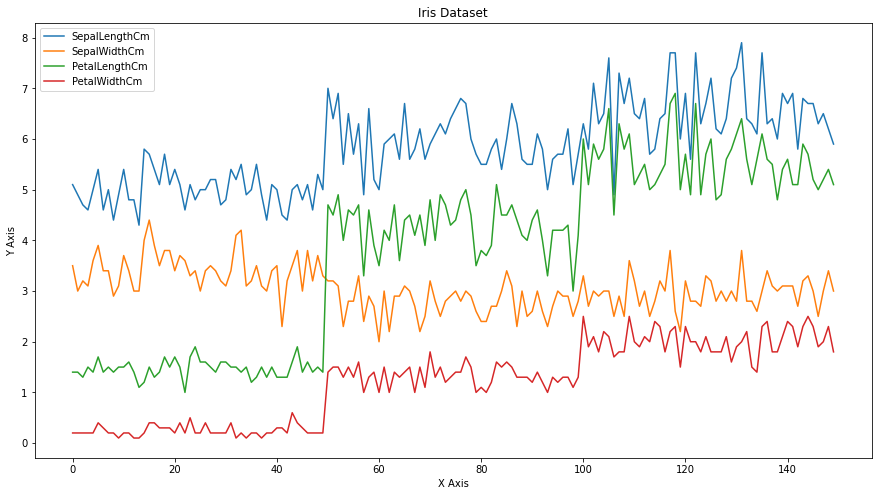

In [9]:
ax = data.plot(figsize=(15,8), title='Iris Dataset')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

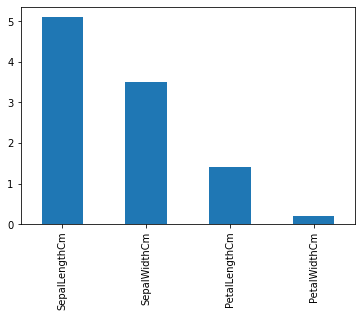

In [10]:
temp_data = data.drop(columns = ['Species'])
temp_data.iloc[0].plot.bar()

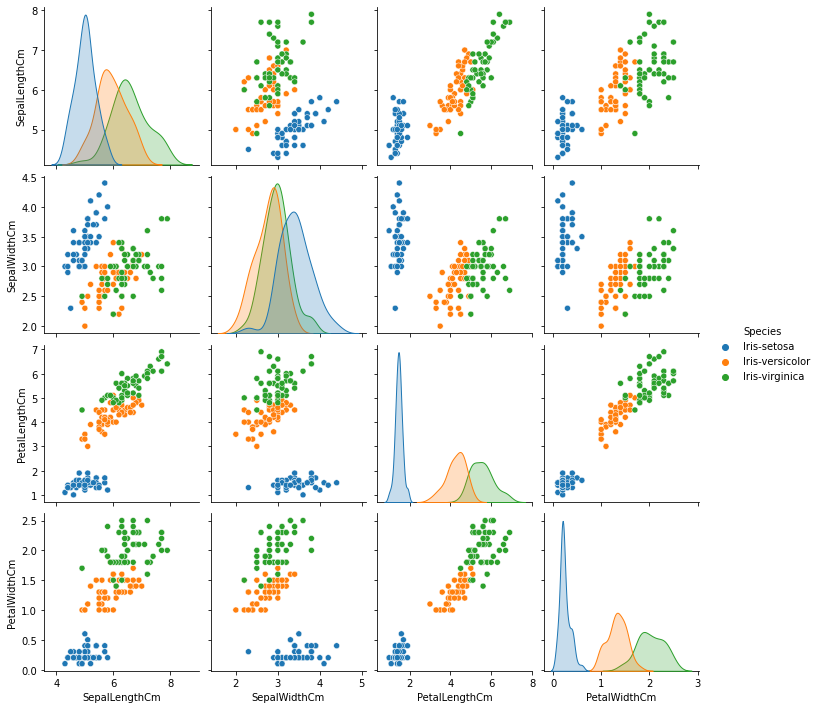

In [11]:
sns.pairplot(data, hue='Species')
plt.show()

# Coorelation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.



In [12]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


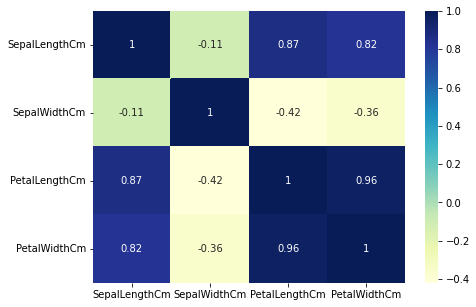

In [13]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

# Label encoding
Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
Le = LabelEncoder()

In [16]:
data['Species'] = Le.fit_transform(data['Species'])

In [17]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Splitting the Data

In [18]:
X = data.drop(columns=['Species'])
y = data['Species']

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler

In [20]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
vif_data = pd.DataFrame()
vif_data['VIF_score'] = [VIF(X_scaled,i) for i in range(X_scaled.shape[1])]
vif_data['Features'] = X.columns
vif_data

,VIF_score,Features
0,7.103113,SepalLengthCm
1,2.099039,SepalWidthCm
2,31.397292,PetalLengthCm
3,16.141564,PetalWidthCm


In [22]:
#although the scores are unstable and need adjustments but we are ignoring that for the current dataset.

In [23]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=355)

# Model Training


In [36]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
Lgr = LogisticRegression()

In [37]:
Lgr.fit(x_train,y_train)

LogisticRegression()

In [38]:
Accuracy = Lgr.score(x_test, y_test) * 100
print(f"Accuracy: {Accuracy}%")

Accuracy: 97.77777777777777%


In [27]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
DCT = DecisionTreeClassifier(criterion = 'entropy')

In [28]:
DCT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
Accuracy_1 = DCT.score(x_test, y_test) * 100
print(f"Accuracy: {Accuracy_1}%")

Accuracy: 97.77777777777777%


In [30]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

In [31]:
#Performing Grid search for parameter tunning.
grid_search = GridSearchCV(estimator=DCT,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [32]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [33]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'random'}


In [34]:
DCT = DecisionTreeClassifier(criterion = 'gini', max_depth =8, min_samples_leaf= 1, min_samples_split= 7, splitter ='random')
DCT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=7, splitter='random')

In [35]:
DCT.score(x_test,y_test)

1.0

In [ ]:
#As you can observe we got 100% accuracy using gridsearch approach.